In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/D")

Drive already mounted at /D; to attempt to forcibly remount, call drive.mount("/D", force_remount=True).


In [3]:
working_path = '/D/MyDrive/Colab Notebooks/imdb_data.csv'
df = pd.read_csv(working_path)
df.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


In [4]:
def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*75)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    return summary


In [5]:
df = df[[ 'budget' , 'popularity' , 'popularity' , 'revenue' ]]
DataInfoAll(df)

Dataset Shape: (3000, 4)
---------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,budget,int64,0,406,1.400000e+07,4.000000e+07
1,popularity,float64,0,2999,6.575393e+00,8.248895e+00
2,popularity,float64,0,2999,6.575393e+00,8.248895e+00
3,revenue,int64,0,2850,1.231465e+07,9.514944e+07


In [6]:
DataInfoAll(df)

Dataset Shape: (3000, 4)
---------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,budget,int64,0,406,1.400000e+07,4.000000e+07
1,popularity,float64,0,2999,6.575393e+00,8.248895e+00
2,popularity,float64,0,2999,6.575393e+00,8.248895e+00
3,revenue,int64,0,2850,1.231465e+07,9.514944e+07


* **Dependent variables** are *budget , popularity , popularity*
* **Independent variable** is *revenue*

In [7]:
x = df.drop(labels = ['revenue'] , axis= 1)
y = df.revenue

In [8]:
x.head(3)

,budget,popularity,popularity
0,14000000,6.575393,6.575393
1,40000000,8.248895,8.248895
2,3300000,64.299990,64.299990


In [9]:
y.head()

0    12314651
1    95149435
2    13092000
3    16000000
4     3923970
Name: revenue, dtype: int64

## Now we want to out of this 3 independent variables to predict the *revenue* which column is contributing how much ???
## To know this we will use **ExtraTreesClassifier**

In [10]:
#Importing ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [11]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy')

In [12]:
# Training the model
extra_tree_forest.fit(x, y)

ExtraTreesClassifier(criterion='entropy', n_estimators=5)

In [13]:
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
feature_importance

array([0.28932032, 0.34143493, 0.36924475])

In [17]:
extra_tree_forest.estimators_ 

[ExtraTreeClassifier(criterion='entropy', random_state=1195470332),
 ExtraTreeClassifier(criterion='entropy', random_state=1640963670),
 ExtraTreeClassifier(criterion='entropy', random_state=987376283),
 ExtraTreeClassifier(criterion='entropy', random_state=2116149819),
 ExtraTreeClassifier(criterion='entropy', random_state=454789335)]

In [14]:
# Normalizing the individual importances
feature_importance_normalized = np.std( [ tree.feature_importances_ for tree in extra_tree_forest.estimators_ ] , axis = 0)
feature_importance_normalized

array([0.06830334, 0.04624473, 0.02897669])

In [15]:
x.columns

Index(['budget', 'popularity', 'popularity'], dtype='object')

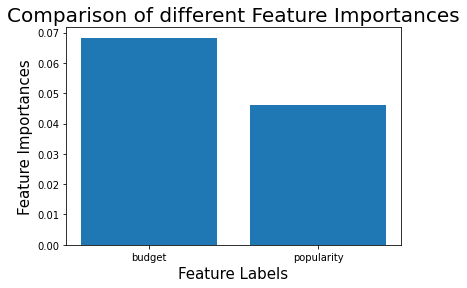

In [16]:
# Plotting a Bar Graph to compare the models
# plt.figure(figsize = (24,12))
plt.bar(x.columns, feature_importance_normalized)
plt.xlabel('Feature Labels' , fontsize = 15)
plt.ylabel('Feature Importances' , fontsize = 15)
plt.title('Comparison of different Feature Importances' , fontsize = 20)
plt.show()



* From this graph we can say that **budget** column is *more important* to predict revenue than **popularity** 